In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from six.moves import urllib
import os
import tarfile
import sklearn
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.linear_model import SGDRegressor

# Downloading the data and Converting it into a dataframe

In [ ]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets","housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [ ]:
#This function creates a dataset/housing directory in the workspace , downloads the housing.tgz fle and extracts
#housing.csv from it in this directory.

def fetch_housing_data(housing_url=HOUSING_URL, housing_path = HOUSING_PATH):        
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [ ]:
fetch_housing_data(HOUSING_URL,HOUSING_PATH)

In [ ]:
# This function returns a Pandas DataFrame object containing all the data
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [ ]:
housing_df = load_housing_data(HOUSING_PATH)

In [ ]:
housing_df.shape

(20640, 10)

In [ ]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Information about the Housing dataframe

In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Checking Null Values

In [ ]:
housing_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## Replacing null values in total_bedrooms column with the median of the column's values

In [ ]:
housing_df['total_bedrooms'] = housing_df['total_bedrooms'].fillna(housing_df.total_bedrooms.median())

In [ ]:
housing_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

# Getting the mean,std deviation,min,max values of the columns of the data using describe function

In [ ]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Histogram plot of the dataframe

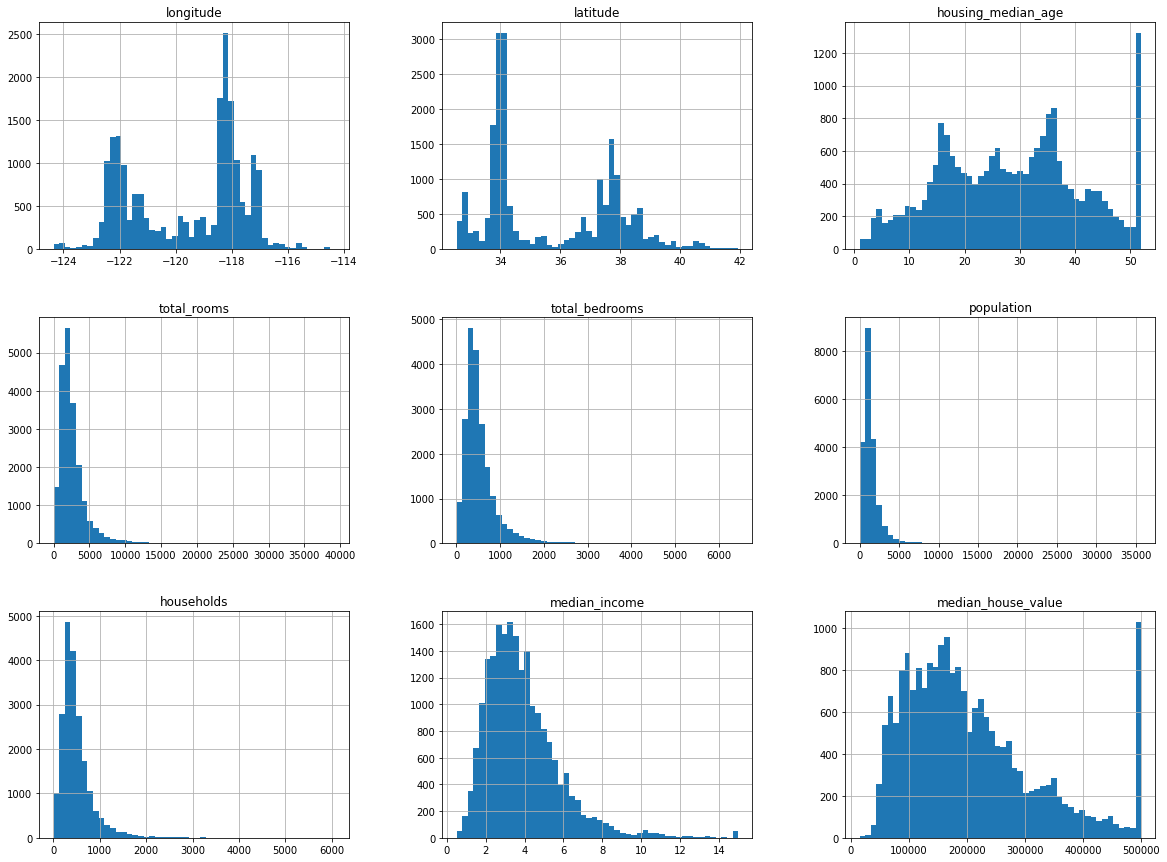

In [ ]:
housing_df.hist(bins = 50 , figsize = (20,15))
plt.show()

# Pairplot for the dataframe

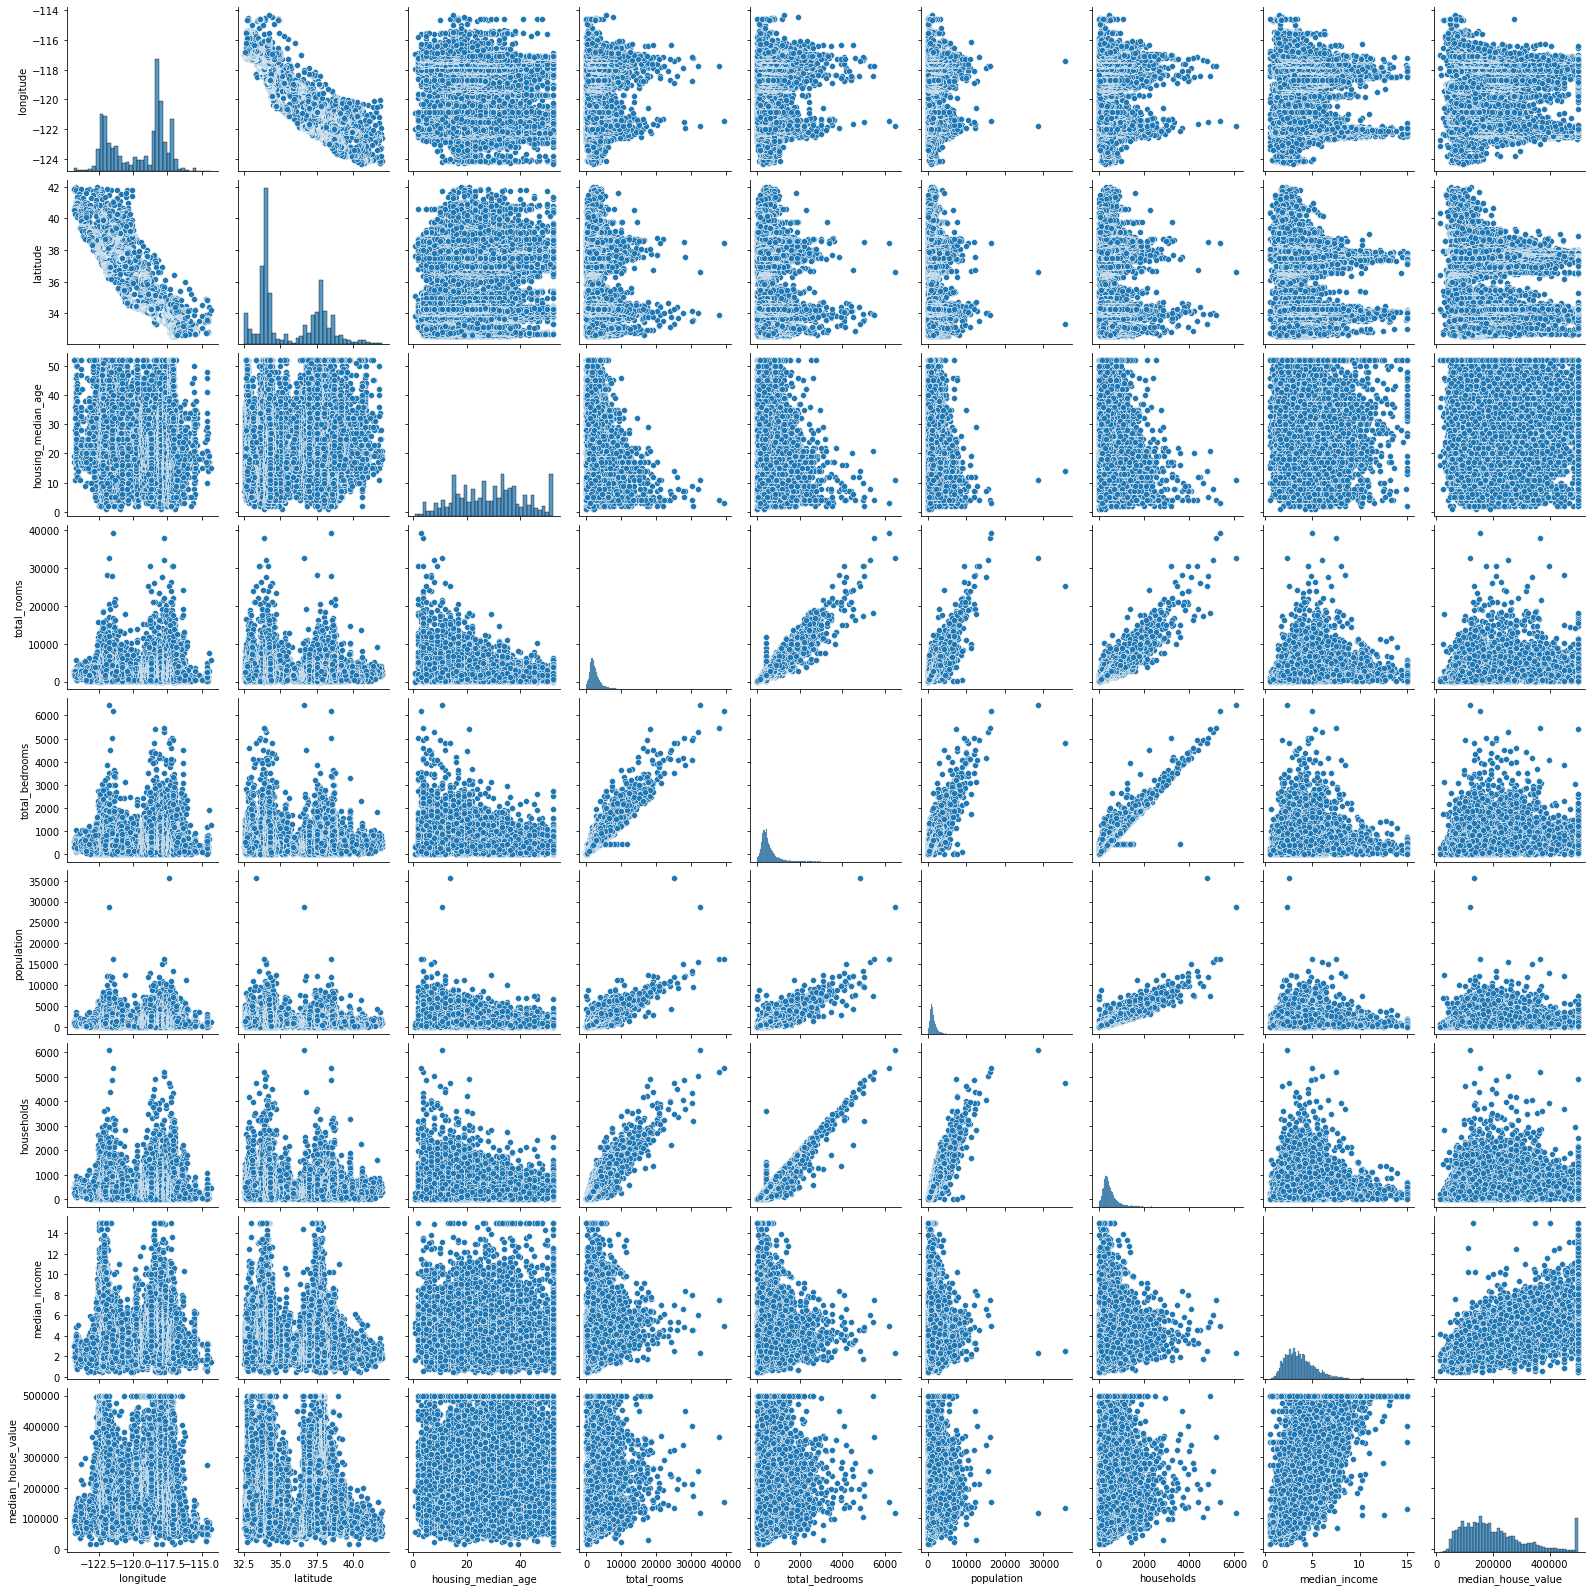

In [ ]:
sns.pairplot(housing_df)

# Correlation Matrix of the dataframe

In [ ]:
housing_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069120,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066484,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927058,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069120,-0.066484,-0.319026,0.927058,1.000000,0.873535,0.974366,-0.007617,0.049457
population,0.099773,-0.108785,-0.296244,0.857126,0.873535,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974366,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007617,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049457,-0.024650,0.065843,0.688075,1.000000


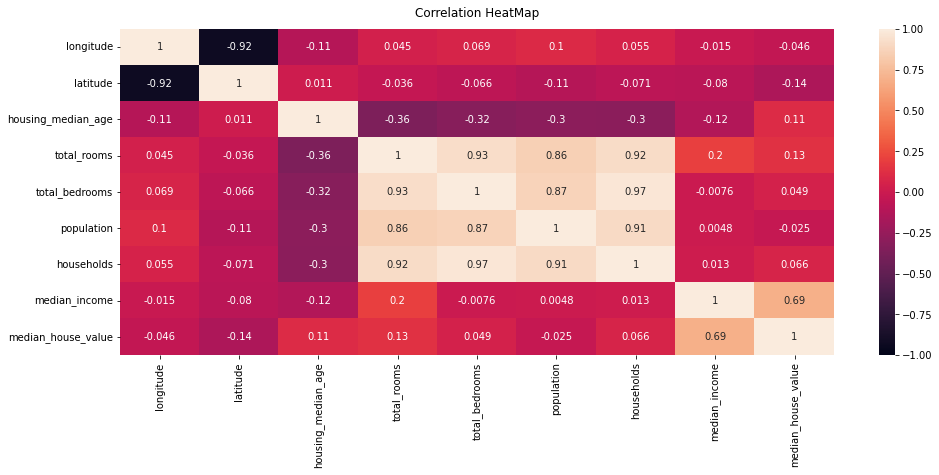

In [ ]:
plt.figure(figsize = (16,6))
corr_heatmap = sns.heatmap(housing_df.corr(),vmin = -1,vmax = 1,annot=True)
corr_heatmap.set_title("Correlation HeatMap",fontdict = {'fontsize': 12}, pad = 12);

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

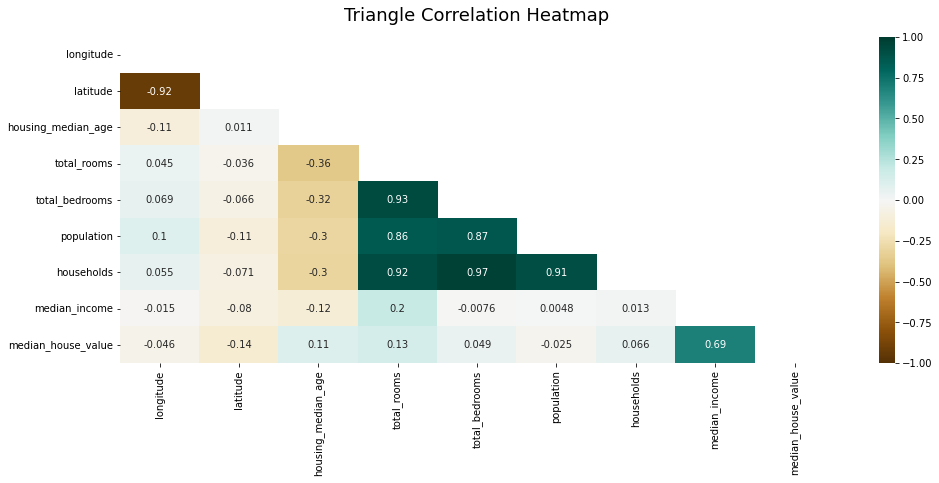

In [ ]:
plt.figure(figsize=(16,6))
mask = np.triu(np.ones_like(housing_df.corr(),dtype = np.bool))
corr_heatmap = sns.heatmap(housing_df.corr(),mask = mask, vmin = -1,vmax = 1, annot = True, cmap = "BrBG")
corr_heatmap.set_title('Triangle Correlation Heatmap',fontdict = {'fontsize': 18},pad = 16)

## Information from Correlation Plot

    1.Total_rooms are highly correlated with households,population,total_bedrooms
    2.Population is highly correlated to the no. of households.
    3.Median_income is correlated to the median house value.
    4.There is high negative correlation between longitude and latitude.

In [ ]:
correlation_columns = ['total_rooms','households','population','total_bedrooms']

In [ ]:
df_correlation_columns = housing_df[correlation_columns]

In [ ]:
df_correlation_columns.head()

,total_rooms,households,population,total_bedrooms
0,880.0,126.0,322.0,129.0
1,7099.0,1138.0,2401.0,1106.0
2,1467.0,177.0,496.0,190.0
3,1274.0,219.0,558.0,235.0
4,1627.0,259.0,565.0,280.0


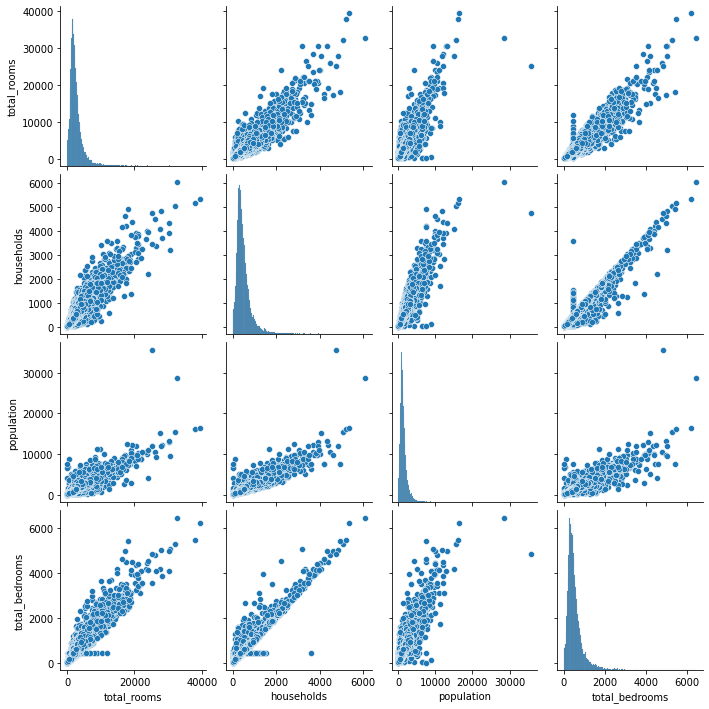

In [ ]:
sns.pairplot(df_correlation_columns)

In [ ]:
correlation_Matrix = housing_df.corr()
correlation_Matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049457
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

# Standardizing Features in the dataframe

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_column_housing_df = housing_df.select_dtypes(include=numerics)

In [ ]:
scaler = StandardScaler()
numeric_column_housing_df_standardized=scaler.fit_transform(numeric_column_housing_df)

In [ ]:
numeric_column_housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [ ]:
numeric_column_housing_df_standardized

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.97703285,
         2.34476576,  2.12963148],
       [-1.32284391,  1.04318455, -0.60701891, ...,  1.66996103,
         2.33223796,  1.31415614],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.84363692,
         1.7826994 ,  1.25869341],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.17404163,
        -1.14259331, -0.99274649],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.39375258,
        -1.05458292, -1.05860847],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.07967221,
        -0.78012947, -1.01787803]])

In [ ]:
numeric_column_housing_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [ ]:
numeric_column_housing_df_standardized = pd.DataFrame(numeric_column_housing_df_standardized,columns = numeric_column_housing_df.columns)

In [ ]:
numeric_column_housing_df_standardized.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900


In [ ]:
columns=numeric_column_housing_df_standardized.columns

In [ ]:
columns = list(columns)

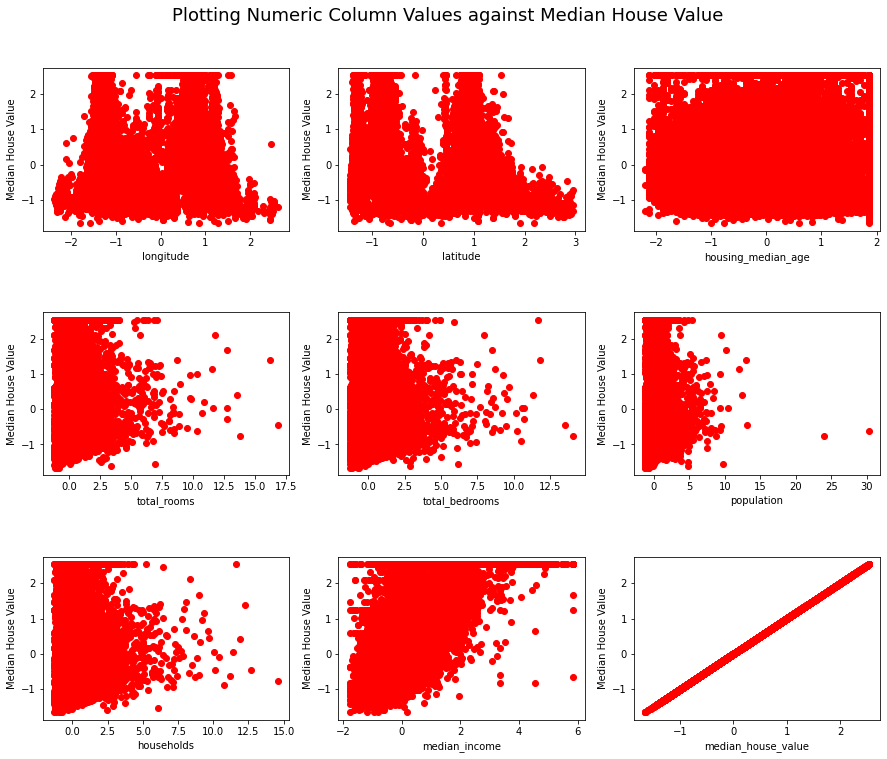

In [ ]:
plt.figure(figsize = (15,12))
plt.subplots_adjust(hspace = 0.5)
plt.suptitle("Plotting Numeric Column Values against Median House Value",fontsize = 18,y = 0.95)
index = 1
for column in columns:
    ax = plt.subplot(3,3,index)
    plt.plot(numeric_column_housing_df_standardized[column],numeric_column_housing_df_standardized['median_house_value'],'ro')
    plt.xlabel(column)
    plt.ylabel("Median House Value")
    index = index +1
    

# Information from Above Plot
    1.Median House Value increases as median income increases.
    2.Rest of the plot does not give much information regarding linearity.

# Handling Categorical Attributes
## One hot Encoding

In [ ]:
housing_ocean_proximity_df = housing_df[["ocean_proximity"]]
categorical_Encoder = OneHotEncoder()
housing_ocean_proximity_one_hot_encoding = categorical_Encoder.fit_transform(housing_ocean_proximity_df)

In [ ]:
housing_ocean_proximity_one_hot_encoding

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [ ]:
housing_ocean_proximity_one_hot_encoding.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
categorical_Encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
one_hot_df = pd.DataFrame(data = housing_ocean_proximity_one_hot_encoding.toarray(), columns =  categorical_Encoder.categories_)

# Concatenating One hot encoding result with the Actual Data Frame

In [ ]:
housing_df = pd.concat([housing_df,one_hot_df],axis = 1)

In [ ]:
housing_df.head(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,"(<1H OCEAN,)","(INLAND,)","(ISLAND,)","(NEAR BAY,)","(NEAR OCEAN,)"
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,0.0,0.0,0.0,1.0,0.0


# Deleting the Ocean Proximity Column

In [ ]:
housing_df = housing_df.drop('ocean_proximity', axis=1)

In [ ]:
housing_df.shape

(20640, 14)

In [ ]:
housing_df.columns

Index([         'longitude',           'latitude', 'housing_median_age',
              'total_rooms',     'total_bedrooms',         'population',
               'households',      'median_income', 'median_house_value',
             ('<1H OCEAN',),          ('INLAND',),          ('ISLAND',),
              ('NEAR BAY',),      ('NEAR OCEAN',)],
      dtype='object')

# Data for the Algorithm
## Splitting the Data Set in ratio 70:30 (Training Set : Testing Dataset)

In [ ]:
train_set , test_set = train_test_split(housing_df,test_size = 0.30,random_state = 42)

## Prepare the Data

In [ ]:
train_columns = train_set.drop("median_house_value",axis = 1)
train_labels = train_set["median_house_value"].copy()

test_columns = test_set.drop("median_house_value",axis = 1)
test_labels = test_set["median_house_value"].copy()

# Applying OLS Linear Regression

In [ ]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(train_columns,train_labels)

LinearRegression()

In [ ]:
housing_prediction_train = lin_reg_model.predict(train_columns)
lin_reg_mse = mean_squared_error(train_labels,housing_prediction_train)
lin_reg_mse = np.sqrt(lin_reg_mse)

In [ ]:
lin_reg_mse

68763.96906778902

In [ ]:
lin_reg_model.coef_

array([-2.65022024e+04, -2.49155605e+04,  1.10597481e+03, -5.87232467e+00,
        1.05721352e+02, -3.73269694e+01,  4.23132106e+01,  3.92696824e+04,
       -1.83838906e+04, -5.94599499e+04,  1.17504655e+05, -2.44499372e+04,
       -1.52108776e+04])

In [ ]:
lin_reg_model.intercept_

-2235603.7108101035

## R2 Coefficient

In [ ]:
lin_reg_model.score(train_columns,train_labels)

0.6470480227253683

# Applying SGD Regressor

In [ ]:
train_columns.shape

(14448, 13)

In [ ]:
train_labels.shape

(14448,)

In [ ]:
list_learning_rate=["optimal", "invscaling", "constant"]
error=[]
r_sq=[]
for lr in list_learning_rate:
  sgd  = SGDRegressor(learning_rate = lr, max_iter=1000000)
  sgd.fit(train_columns, train_labels)
  housing_prediction_train_sgd = sgd.predict(train_columns)
  lin_reg_mse_sgd = mean_squared_error(train_labels,housing_prediction_train_sgd)
  lin_reg_mse_sgd = np.sqrt(lin_reg_mse_sgd)
  r2_sgd= sgd.score(train_columns,train_labels)

  error.append(lin_reg_mse_sgd)
  r_sq.append(r2_sgd)
  


In [ ]:
error


[1.5068784289773347e+17, 109481113202427.31, 7.41210924802767e+16]

In [ ]:
r_sq

[-1.694923802042091e+24, -8.946891197405228e+17, -4.100882918852302e+23]

In [ ]:
class sklearn.linear_model.SGDRegressor(loss='squared_error', *, penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=10000, 
                                        tol=0.001, shuffle=True, verbose=0, epsilon=0.1, random_state=None, learning_rate='invscaling', eta0=0.01, 
                                        power_t=0.25, early_stopping=False, validation_fraction=0.1, 
                                        n_iter_no_change=5, warm_start=False, average=False